# ANOVA 2-Way

In [28]:
# Daten
from pandas import DataFrame
import numpy as np


Daten = DataFrame({
"Batch": np.tile(["1", "2", "3", "4", "5", "6"], 4),
"Methode": np.repeat(["8500", "8700", "8900", "9100"], 6),
"Y": np.array([90.3, 89.2, 98.2, 93.9, 87.4, 97.9, 92.5, 89.5, 90.6, 94.7, 87, 95.8, 85.5,
90.8, 89.6, 86.2, 88, 93.4, 82.5, 89.5, 85.6, 87.4, 78.9, 90.7])
})

In [29]:
# Hypothesentest
import scipy.stats as st
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from patsy.contrasts import Sum

# Die Nebenbedingung Sum() wird hier verwendet 
# Ohne Nebenbedingung --> "Y~Methode*Batch"
# fit = ols("Y~Methode*Batch", data=Daten).fit() 
fit = ols("Y~C(Methode, Sum)+C(Batch,Sum)", data=Daten).fit() 
fit.params


Intercept                  89.795833
C(Methode, Sum)[S.8500]     3.020833
C(Methode, Sum)[S.8700]     1.887500
C(Methode, Sum)[S.8900]    -0.879167
C(Batch, Sum)[S.1]         -2.095833
C(Batch, Sum)[S.2]         -0.045833
C(Batch, Sum)[S.3]          1.204167
C(Batch, Sum)[S.4]          0.754167
C(Batch, Sum)[S.5]         -4.470833
dtype: float64

In [30]:
# 2 way ANOVA
fit = ols("Y~C(Methode, Sum)+C(Batch, Sum)", data=Daten).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
"C(Methode, Sum)",3.0,178.171250,59.390417,8.107077,0.001916
"C(Batch, Sum)",5.0,192.252083,38.450417,5.248666,0.005532
Residual,15.0,109.886250,7.325750,NaN,NaN


## Beispiel Additivität

In [24]:
# Daten
from pandas import DataFrame 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot 
from statsmodels.stats.outliers_influence import summary_table 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Farbe = DataFrame({
"Grund": np.repeat(["A", "B", "C"], 6),
"Methode": np.tile(np.repeat(["Eintauchen", "Besprühen"], 3), 3), 
"Y": np.array([4, 4.5, 4.3, 5.4, 4.9, 5.6, 5.6, 4.9, 5.4, 5.8, 6.1, 
6.3, 3.8, 3.7, 4, 5.5, 5, 5])
})

In [26]:
fit = ols("Y~C(Methode, Sum)+C(Grund, Sum)", data=Farbe).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
"C(Methode, Sum)",1.0,4.908889,4.908889,55.974661,0.000003
"C(Grund, Sum)",2.0,4.581111,2.290556,26.118552,0.000019
Residual,14.0,1.227778,0.087698,NaN,NaN


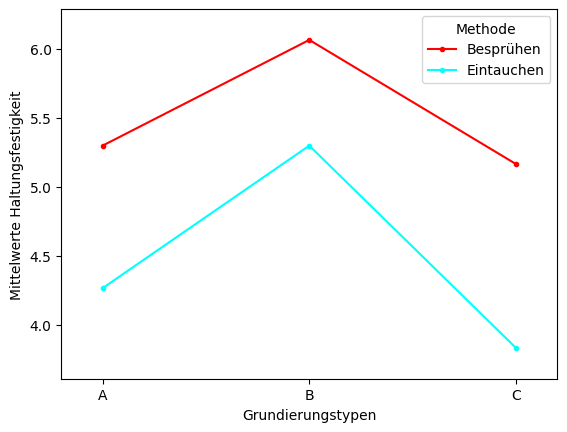

In [27]:
interaction_plot(x=Farbe["Grund"], trace=Farbe["Methode"], response=Farbe["Y"])
plt.xlabel("Grundierungstypen") 
plt.ylabel("Mittelwerte Haltungsfestigkeit")
plt.show()

Aufgrund des Interaktionsplots gibt es keinen Hinweis, dass das Verfahren, Grundierungsfarben aufzutragen, mit der Art der Grundierungsfarbe interagiert.  
  
Mit anderen Worten: egal, welche Grundierungsfarbe wir auftragen, das Verfahren, Eintauchen oder Besprühen, hat keinen Einﬂuss auf die Haftfestigkeit.

## Beispiel interaktion
### 1) Fruchtbarkeit von Schnecken
Fruchtbarkeit von Schnecken in Abhängigkeit der Jahreszeit und der Bevölkerungsdichte der Schnecken. The Zielvariable ist die Anzahl gelegter Eier.

In [1]:
# Daten
from pandas import DataFrame 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot 
from statsmodels.stats.outliers_influence import summary_table 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

snails = DataFrame({
'season': np.repeat(['spring', 'summer'], 9),
'density': np.tile(np.repeat(['6', '12','24'],3),2),
'Y': np.array([1.17, 0.50, 1.67, 1.50, 0.83, 1.00,
0.67, 0.67, 0.75, 4.00, 3.83, 3.83, 
3.33, 2.58, 2.75, 2.54, 1.83, 1.63])
})

In [17]:
fit = ols('Y~season*density',data=snails).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
season,1.0,17.130756,17.130756,119.373466,1.364839e-07
density,2.0,4.001011,2.000506,13.940266,7.422016e-04
season:density,2.0,1.689144,0.844572,5.885293,1.655191e-02
Residual,12.0,1.722067,0.143506,NaN,NaN


Der P-Wert für die Jahreszeit und Schneckendichte (season:density) ist Signifikant 1.655191e-02 < 0.05
--> Genauere Analyse mit einem Interaktionsplot

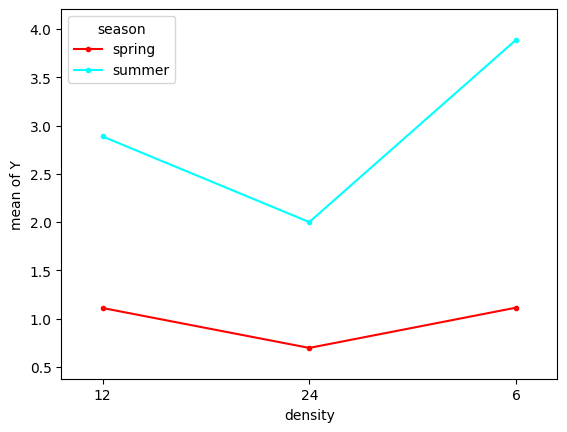

In [6]:
interaction_plot(x=snails['density'], trace=snails['season'], 
response=snails['Y'])
plt.show()

Da die Linien im Interaktionsplot nicht parallel verlaufen, besteht ein Hinweis auf einen Interaktionseffekt. Insbesondere scheint der Wert density=6 für season=spring "aus der Reihe zu tanzen". --> Analyse der Jahreszeiten individuell

In [13]:
snails_spring = snails[snails['season']=='spring']
fit_spring = ols('Y~density',data=snails_spring).fit()
anova_lm(fit_spring)

snails_summer = snails[snails['season']=='summer']
fit_summer = ols('Y~density',data=snails_summer).fit()
anova_lm(fit_summer)

print(f'Spring:\n {anova_lm(fit_spring)}') 
print(f'Summer:\n {anova_lm(fit_summer)}') 


Spring:
            df    sum_sq   mean_sq         F    PR(>F)
density   2.0  0.344467  0.172233  1.103903  0.390636
Residual  6.0  0.936133  0.156022       NaN       NaN
Summer:
            df    sum_sq   mean_sq          F    PR(>F)
density   2.0  5.345689  2.672844  20.405123  0.002106
Residual  6.0  0.785933  0.130989        NaN       NaN


Der P-Wert für den Spring zeigt nun keinen Signifikanten Unterschied mehr. Hingegen, jener für den Sommer immernoch.  
Wir schliessen daraus, dass es im Sommer signiﬁkante Unterschiede in Bezug auf die 
Menge der gelegten Schneckeneier für die jeweiligen Gruppen mit unterschiedlicher 
Dichte gibt. Im Frühling sind die Unterschiede jedoch nicht signiﬁkant. Offenbar hat 
die Jahreszeit einen Effekt auf die Menge gelegter Eier bei unterschiedlichen Schne-
ckendichten.

### 2) Lebensdauer der Temperatur abhängig von der Cyanid-Konzentration

In [32]:
# Daten
from pandas import DataFrame 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot 
from statsmodels.stats.outliers_influence import summary_table 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

El = DataFrame({
"Konz": np.repeat(["A", "B", "C","D"], 6),
"Temp": np.tile(np.repeat(["15C", "25C"],3),4),
"Y": np.array([82, 46, 16, 20, 13, 7, 20, 14, 17, 6, 7, 5, 8, 6, 5, 
4, 3, 5, 10, 7, 5, 6, 4, 5])
})

In [35]:
fit = ols('Y~C(Konz,Sum)*C(Temp,Sum)',data=El).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
"C(Konz, Sum)",3.0,2531.125000,843.708333,5.843867,0.006803
"C(Temp, Sum)",1.0,950.041667,950.041667,6.580375,0.020754
"C(Konz, Sum):C(Temp, Sum)",3.0,1050.458333,350.152778,2.425301,0.103439
Residual,16.0,2310.000000,144.375000,NaN,NaN


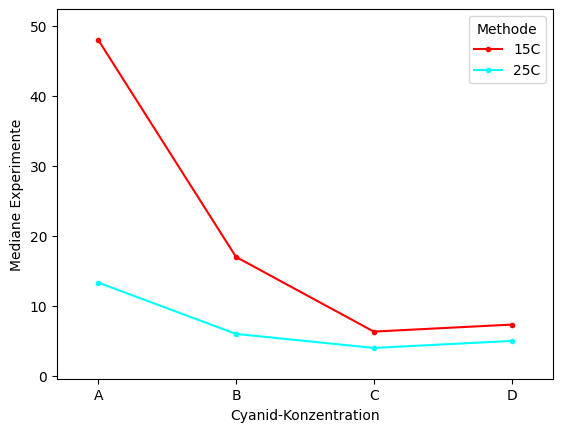

In [36]:
interaction_plot(x=El["Konz"], trace=El["Temp"], response=El["Y"], legendtitle="Methode")
plt.xlabel("Cyanid-Konzentration") 
plt.ylabel("Mediane Experimente")
plt.show()

Der P-Wert besagt, dass es keinenen Signifikanten unterschied gibt. --> genauer untersuchen!

In [42]:
T_15C = El[El['Temp']=='15C']
T_25C = El[El['Temp']=='25C']

fit_15C = ols('Y~Konz',data=T_15C).fit()
anova_lm(fit_15C)

fit_25C = ols('Y~Konz',data=T_25C).fit()
anova_lm(fit_25C)

print(f'15C:\n {anova_lm(fit_spring)}') 
print(f'25C:\n {anova_lm(fit_summer)}') 

15C:
            df    sum_sq   mean_sq         F    PR(>F)
density   2.0  0.344467  0.172233  1.103903  0.390636
Residual  6.0  0.936133  0.156022       NaN       NaN
25C:
            df    sum_sq   mean_sq          F    PR(>F)
density   2.0  5.345689  2.672844  20.405123  0.002106
Residual  6.0  0.785933  0.130989        NaN       NaN


Die Analyse bestätigt die vorherigen Beobachtungen.  
Bei tiefen Temperaturen (15C) ziegt sich kein Signifikanter einfluss der Cyanid-Konzentration auf die Lebensdauer.  
Die wärmeren Temperaturen (25c) zeichnet sich ein Signifikanter einfluss der Cyanid-Konzentration auf die Lebensdauer ab.